<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1VGgesA7mir_mmdS6WidOflg1Y-49_fI7" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# **Operaciones entre imágenes**

Empezamos definiendo una función para subir imágenes.

In [1]:
from google.colab import files
import os

def subir_imagen():
    # Pedir al usuario que seleccione un archivo
    uploaded = files.upload()

    # Obtener el nombre del archivo y su contenido
    file_name = next(iter(uploaded))
    file_content = uploaded[file_name]

    # Definir el directorio donde se almacenará el archivo
    target_dir = '/content/imagenes'
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    # Almacenar el archivo en el directorio especificado
    file_path = os.path.join(target_dir, file_name)
    with open(file_path, 'wb') as f:
        f.write(file_content)

    return file_path

Subimos una ..

In [2]:
ruta1 = subir_imagen()

Saving e88f286b44f34bf3b1882436358f79aa.jpg to e88f286b44f34bf3b1882436358f79aa.jpg


Subimos otra ..

In [3]:
ruta2 = subir_imagen()

Saving ProhibitionSign2.svg.png to ProhibitionSign2.svg.png


Ahora leemos las dos imágenes y procuramos que sean de mismo tamaño.

También las reduciremos guardando la proporción alto/ancho.

In [8]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def resize_image(image, max_width=500):
    h, w = image.shape[:2]
    aspect_ratio = h / w

    if w > max_width:
        new_width = max_width
        new_height = int(new_width * aspect_ratio)
        resized_image = cv2.resize(image, (new_width, new_height))
        return resized_image
    else:
        return image

def show_with_text(image, text):
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image, text, (10, 40), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
    cv2_imshow(image)

# Leer dos imágenes para operaciones
img1 = cv2.imread(ruta1).astype(np.float32)
img2 = cv2.resize(cv2.imread(ruta2), (img1.shape[1], img1.shape[0])).astype(np.float32)

# Redimensionar las imágenes
img1 = resize_image(img1)
img2 = resize_image(img2)

# Asegurarse de que las imágenes tengan las mismas dimensiones
if img1.shape[0] > img2.shape[0]:
    img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
elif img1.shape[0] < img2.shape[0]:
    img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

# Ahora img1 e img2 tienen el mismo tamaño y puedes proceder con las operaciones


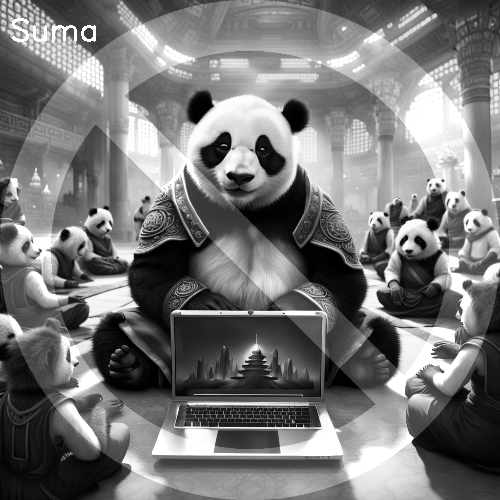

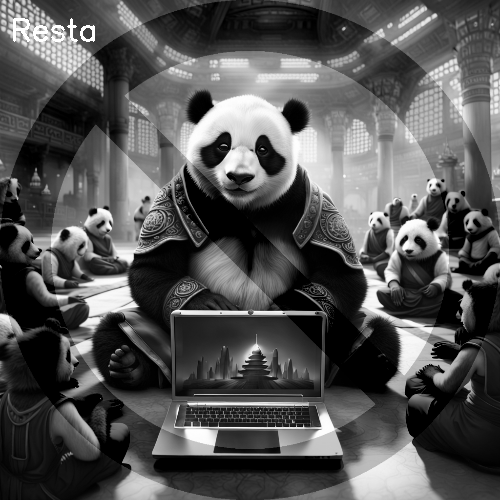

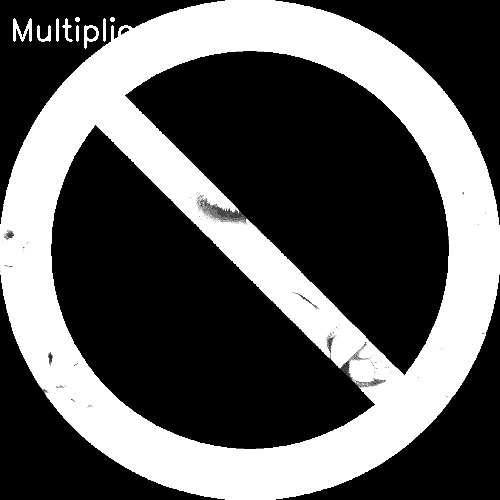

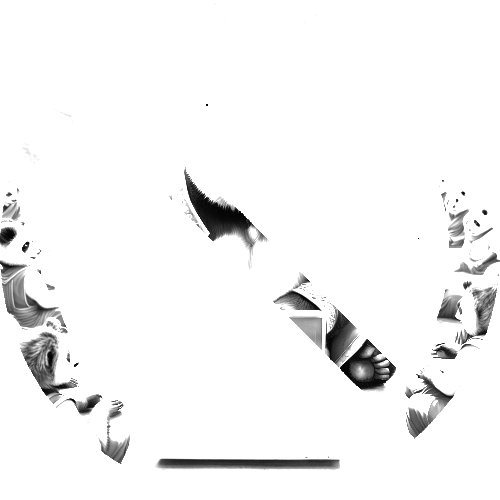

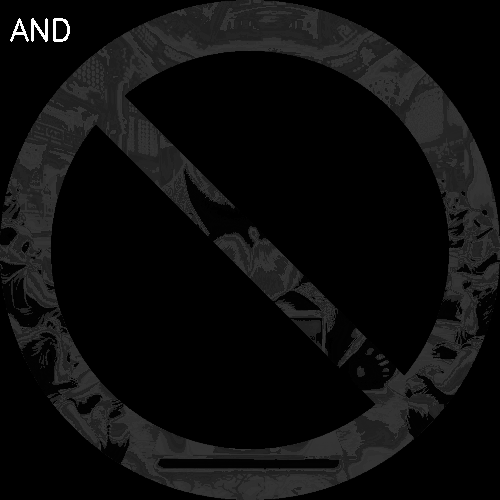

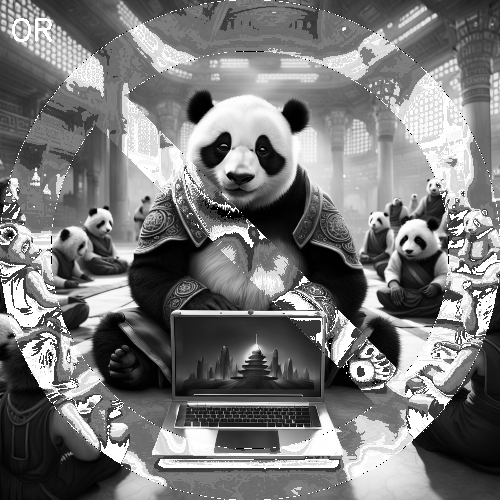

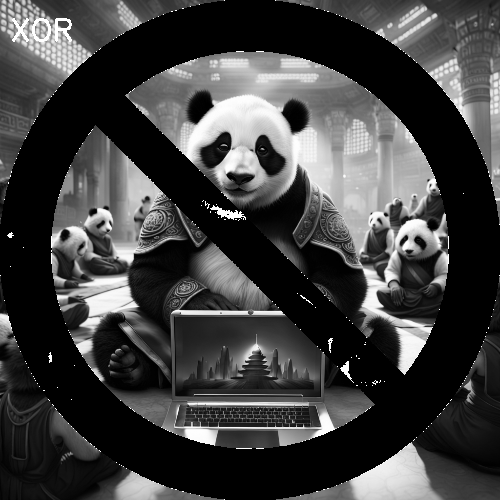

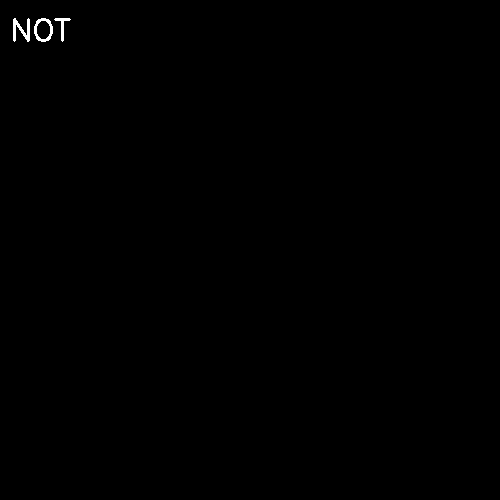

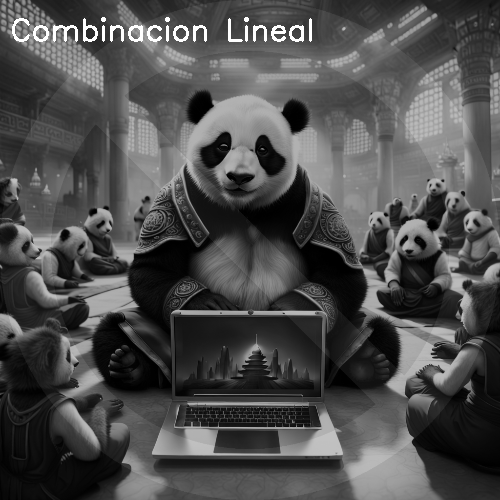

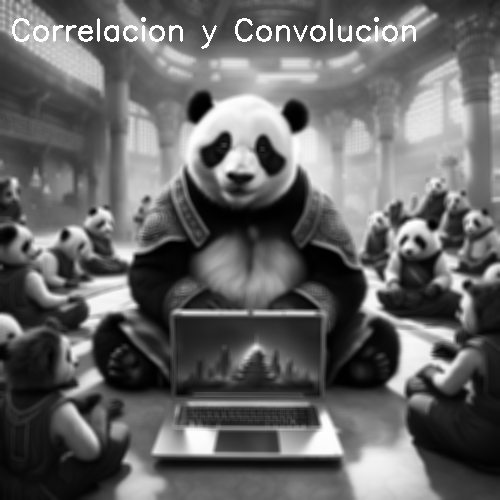

In [9]:
# Convertir a escala de grises
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Suma de imágenes
img_sum = cv2.add(img1, img2)
show_with_text(img_sum, 'Suma')

# Resta de imágenes
img_subtract = cv2.subtract(img1, img2)
show_with_text(img_subtract, 'Resta')

# Multiplicación de imágenes
img_multiply = cv2.multiply(img1, img2)
show_with_text(img_multiply, 'Multiplicacion')

# División de imágenes
img_divide = cv2.divide(img1, img2.astype(np.float32)) * 255
show_with_text(img_divide, 'Division')

# Operaciones lógicas (AND, OR, XOR, NOT)
img_and = cv2.bitwise_and(img1, img2)
show_with_text(img_and, 'AND')

img_or = cv2.bitwise_or(img1, img2)
show_with_text(img_or, 'OR')

img_xor = cv2.bitwise_xor(img1, img2)
show_with_text(img_xor, 'XOR')

img_not = cv2.bitwise_not(img1)
show_with_text(img_not, 'NOT')

# Combinación lineal (alfa*img1 + beta*img2 + gamma)
img_linear_comb = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)
show_with_text(img_linear_comb, 'Combinacion Lineal')

# Correlación y convolución (desenfoque como ejemplo)
kernel = np.ones((5, 5), np.float32) / 25
img_blur = cv2.filter2D(img1, -1, kernel)
show_with_text(img_blur, 'Correlacion y Convolucion')
